# 🛳️ Which passengers survived the Titanic shipwreck? 🛳️
**Machine Learning Tabular Data Binary Classification**

---

Ahoy!

How many times have you wondered if you would survive the Titanic crash? Alright, maybe not to much. I think you'd rather know the answer to: why Rose didn't share that goddamned door!? 🚪 💔 (I hope you've seen the movie).

I can't help you with this question (though perhaps displacement is a clue). But we're going to have fun with machine learning to create a model that predicts which passengers will survive the Titanic shipwreck!

To do this, we're going to pick up the gauntlet and we take part in the Kaggle [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic/overview) competition. We'll be working on train dataset containing nearly 900 passengers data records and after we create the best model we can afford, we'll send our predictions on test dataset to the Kaggle platform which will evaluate our model.

Sounds exciting, doesn't it? I hope you enjoy it as much as I did. 🙂

---

The plan for this project is as follows:
1. Preparing our workspace
2. Getting familiar with data
3. Feature Engineering
4. Data Preprocessing
5. 🤖 Testing different models 🤖
6. Improving selected models
7. Trying to experiment (a little) and final testing results
8. Saving, loading and final training selected models
9. Making predictions and submissions to send
10. Getting evaluated by Kaggle and summary

---

It looks simple, right? Let's not waste time and get to work!

## 1. Preparing our workspace

Firstly, we need necessary packages with core libraries. As you can see, I commented out this section because in my case I'm sure that I have them installed.

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install sklearn
# !pip install seaborn
# !pip install pandas_profiling
# !pip install xgboost
# !pip install lightgbm
# !pip install ipywidgets
# !pip install IPython

Now we can import libraries which we are going to use in this project. I decided to import all of functions and modules here, so there's a little spoiler here of what we are going to use. 🙂

In [2]:
# Basic data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data exploration
from pandas_profiling import ProfileReport

# Data preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer

# Split data
from sklearn.model_selection import train_test_split

# Supervised Learning Estimators - Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Classification Metrics
from sklearn.model_selection import cross_val_score

# Tune model
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Hide warnings
import warnings
from sklearn.exceptions import ConvergenceWarning

# Experiment
from sklearn.ensemble import VotingClassifier
from itertools import combinations

# Save and load model
import pickle

# Others
import os
from IPython.display import clear_output, Image
from copy import deepcopy

At the end, we'll check and display versions of our packages - this may be helpful in the future if we want to compare other results at a different time.

In [3]:
import sys
import matplotlib
import sklearn
import pandas_profiling
import xgboost
import lightgbm

print(f'Python: {sys.version}')
print(f'pandas: {pd.__version__}')
print(f'NumPy: {np.__version__}')
print(f'Matplotlib: {matplotlib.__version__}')
print(f'scikit-learn: {sklearn.__version__}')
print(f'pandas_profiling: {pandas_profiling.__version__}')
print(f'XGBoost: {xgboost.__version__}')
print(f'LightGBM: {lightgbm.__version__}')

Python: 3.10.4 (main, Mar 31 2022, 08:41:55) [GCC 7.5.0]
pandas: 1.4.3
NumPy: 1.23.1
Matplotlib: 3.5.2
scikit-learn: 1.1.2
pandas_profiling: 3.2.0
XGBoost: 1.6.1
LightGBM: 3.3.2


Alright, so now we can go to the next, more exciting step.

## 2. Getting familiar with data

Firstly, we can look on discription of our data which we could find on [Kaggle website](https://www.kaggle.com/competitions/titanic/data). There we can find the list of variables, their specifications and types.

However, while reading the data description is important, it is not enough. We have to do deeper data exploration to be sure, that our data is ready for later prediction.

We'll start with loading data using pandas. I downloaded them earlier from [here](https://www.kaggle.com/competitions/titanic/data) and put them in the `data` folder.

In [4]:
data_train = pd.read_csv("data/train.csv")
data_test = pd.read_csv("data/test.csv")

In [5]:
data_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
data_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

Ok, it worked. The data has been successfully loaded. 

As we can see right now, the structre of data is the same for training and test set. The only difference in the features is the variable to estimate `predict` like it should be.

At a later stage it will be useful to have a combined database of training and testing sets, so we'll prepare it.

In [7]:
data_train['train_test'] = 1
data_test['train_test'] = 0
data_test['Survived'] = np.NaN
all_data = pd.concat([data_train,data_test], ignore_index=True)
all_data

PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male   NaN      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male   NaN      0   
1308                           Peter, Master. Michael J    male   NaN      1   

      Parch              Ticket      Fare Cabin Embarked  train_test  
0         0           A/5 21171    7.2500   NaN        S           1  
1         0            PC 17599   71.2833   C85        C           1  
2         0    STON/O2. 3101282    7.9250   NaN        S           1  
3         0              113803   53.1000  C123        S           1  
4         0              373450    8.0500   NaN        S           1  
...     ...                 ...       ...   ...      ...         ...  
1304      0           A.5. 3236    8.0500   NaN        S           0  
1305      0            PC 17758  108.9000  C105        C           0  
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S           0  
1307      0              359309    8.0500   NaN        S           0  
1308      1                2668   22.3583   NaN        C           0  

[1309 rows x 13 columns]

All right, we can move on to the data exploration. There's no one particular way of doing this. But what we should do is to become more familiar with the dataset.

### Basic review
We'll focus primarily on training data, cause we have it labeled. First, a brief description of the data.

In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [9]:
data_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  train_test  
count  891.000000  891.000000       891.0  
mean     0.381594   32.204208         1.0  
std      0.806057   49.693429         0.0  
min      0.000000    0.000000         1.0  
25%      0.000000    7.910400         1.0  
50%      0.000000   14.454200         1.0  
75%      0.000000   31.000000         1.0  
max      6.000000  512.329200         1.0

Missing values

In [10]:
data_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
train_test       0
dtype: int64

In [11]:
data_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
train_test       0
Survived       418
dtype: int64

Hmm, filling missing values of `Emabarked` shouldn't be problematic. In the next steps of the project we'll consider how to approach `Age` and `Cabin`.

Ok, now let's take a look at numeric and categorical variables separately.

In [12]:
data_train_num = data_train[['Age','SibSp','Parch','Fare']]
data_train_cat = data_train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

### Numeric data
Histograms

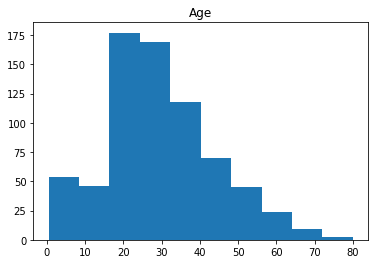

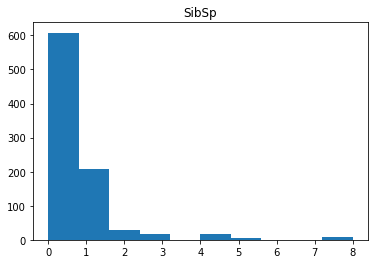

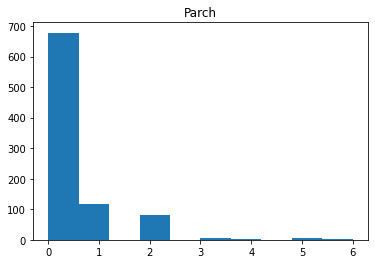

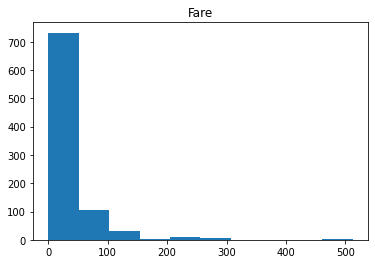

In [13]:
for column in data_train_num.columns:
    plt.hist(data_train_num[column])
    plt.title(column)
    plt.show()

Correlation matrix

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


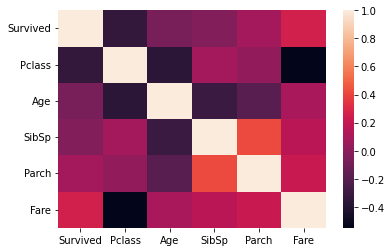

In [14]:
print(data_train.drop(["PassengerId", "train_test"], axis=1).corr())
sns.heatmap(data_train.drop(["PassengerId", "train_test"], axis=1).corr());

Mean values in pivot table

In [15]:
print(pd.pivot_table(data_train, index="Survived", values=['Age','SibSp','Parch','Fare'], aggfunc=np.mean))

                Age       Fare     Parch     SibSp
Survived                                          
0         30.626179  22.117887  0.329690  0.553734
1         28.343690  48.395408  0.464912  0.473684


### Categorical data

Histograms

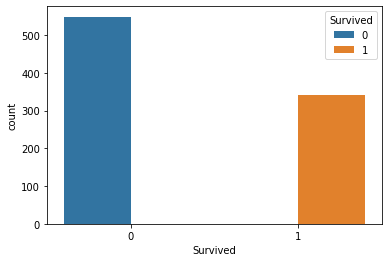

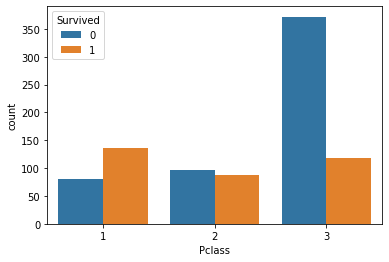

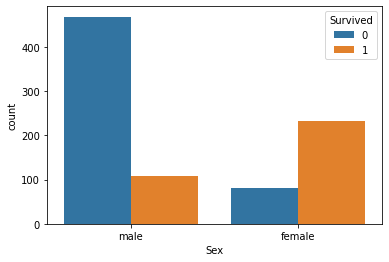

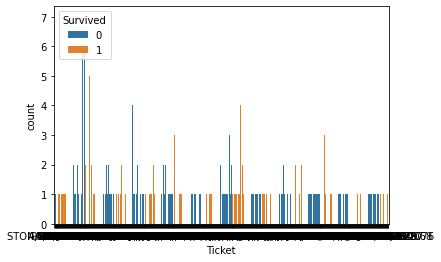

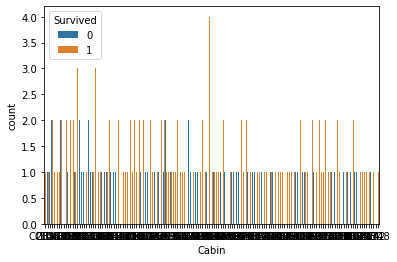

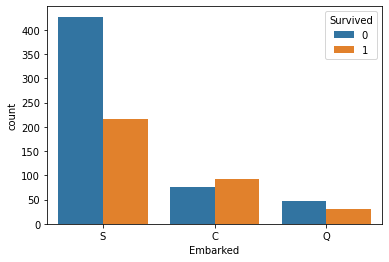

In [16]:
for col in data_train_cat.columns:
    sns.countplot(hue='Survived', x=col, data=data_train)
    plt.show()

Number of survived by category (no point doing by `Ticket` and `Cabin`).

In [17]:
for col in ['Pclass', 'Sex', 'Embarked']:
    print(pd.pivot_table(data_train, values='PassengerId', index='Survived', columns=col, aggfunc='count'))
    print()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217



### Generate reports
The other way to get basic analysis quickly is using the `pandas_profiling` library.

To be honest - it includes what we generated above plus lots of other details. We'll generate them for both of our datasets.

In [18]:
profile_train = ProfileReport(data_train, title='Train Dataset', html = {'style':{'full_width': True}})
profile_train

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
profile_test = ProfileReport(data_test, title='Test Dataset', html = {'style':{'full_width': True}})
profile_test

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Problem with displaying reports? Check the `data` folder, reports have been exported there for this case.

In [20]:
# profile_train.to_file("data/Report-train_dataset.html")
# profile_test.to_file("data/Report-test_dataset.html")

### Summary for the next steps

* Our training dataset is a slightly unbalanced - 62:38 with a prodominance for non-survived. This isn't critical, but in the case of model evaluations, we should be careful.

* `Sex` appears to be the variable with the greatest direct impact on the target variable.

* Relatively many of our variables are correlated with each other. However, we'll not worry about it at this stage.

* We have 3 high cardinality (unique or almost unique values) features: `Name`, `Ticket`, `Cabin`. We'll try some ideas to get something interesting from them:
    * We'll get a title from `Name` (like "Miss", "Ms.", "Mrs.").
    * Some tickets from `Ticket` seems to have markings at beginning - we'll check their cardinality. We'll also check if and how often the ticket numbers are repeated.
    * 687 out of 891 records have no value for `Cabin`, the others have an alphabetic, single-letter designation at beginning - we'll turn this information into a new variable. Also, one cell of record may contain information about more than one cabin. We'll consider whether we use this information.
    
    
* We have to deal with missing values

* One ticket can be assigned to several people, which gives us information about companions. We will think about whether and how to use this information.

* It seems that we can combine the features `SibSp` (# of siblings/spouses aboard) and `Parch` (# of parents / children aboard) into one, meaning the size of the family. We'll check it.

* We'll check the sense of grouping some variables.

Ok, we have some work ahead of us, so let's not extend it - let's start!

## 3. Feature Engineering
At this stage of the project, we will play a little bit with the data to add / remove / change variables.

We'll work here on a copy of our data and in the next section "Data preprocessing" we'll introduce the developed changes.

In [21]:
temp_dataset = all_data.copy()
temp_dataset

PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male   NaN      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male   NaN      0   
1308                           Peter, Master. Michael J    male   NaN      1   

      Parch              Ticket      Fare Cabin Embarked  train_test  
0         0           A/5 21171    7.2500   NaN        S           1  
1         0            PC 17599   71.2833   C85        C           1  
2         0    STON/O2. 3101282    7.9250   NaN        S           1  
3         0              113803   53.1000  C123        S           1  
4         0              373450    8.0500   NaN        S           1  
...     ...                 ...       ...   ...      ...         ...  
1304      0           A.5. 3236    8.0500   NaN        S           0  
1305      0            PC 17758  108.9000  C105        C           0  
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S           0  
1307      0              359309    8.0500   NaN        S           0  
1308      1                2668   22.3583   NaN        C           0  

[1309 rows x 13 columns]

In this section, I have outlined all the ideas I found worth checking out. Eventually, I abandoned some of them at the stage of section *5. Testing different models* of this project. To keep the notebook clear, I have omitted to present the results of such tests, and have only described the results.

### `Title`

We'll get title from passager's name.

In [22]:
temp_dataset['Title'] = temp_dataset['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
temp_dataset.groupby('Title').agg({'PassengerId': 'count', 'train_test': 'sum', 'Survived':'mean'}).sort_values(by="PassengerId", ascending=False).rename(columns={"PassengerId": "count", "train_test": "count_train", "Survived": "% survived"})

count  count_train  % survived
Title                                       
Mr              757          517    0.156673
Miss            260          182    0.697802
Mrs             197          125    0.792000
Master           61           40    0.575000
Rev               8            6    0.000000
Dr                8            7    0.428571
Col               4            2    0.500000
Ms                2            1    1.000000
Major             2            2    0.500000
Mlle              2            2    1.000000
Sir               1            1    1.000000
Capt              1            1    0.000000
Mme               1            1    1.000000
Lady              1            1    1.000000
Jonkheer          1            1    0.000000
Dona              1            0         NaN
Don               1            1    0.000000
the Countess      1            1    1.000000

I think it's a good idea to reduce the number of titles a bit. We'll group them to: "Mr", "Miss", "Mrs", "Master" and "Other" in next section.

### `TicketMark`

In the process of reviewing the data I noticed that some marks are the same, but with different case of letters or with the signs `.` and `/` in various places.
I deciated to fuze them.

In [23]:
temp_dataset['TicketMark'] = temp_dataset['Ticket'].apply(lambda x: x[:x.rfind(' ')].replace('.', '').replace('/', '').replace(' ', '').upper() if ' ' in x else "is_null")
temp_dataset.groupby('TicketMark').agg({'PassengerId': 'count', 'train_test': 'sum', 'Survived':'mean'}).sort_values(by="PassengerId", ascending=False).rename(columns={"PassengerId": "count_all", "train_test": "count_train", "Survived": "% survived (train set)"})

count_all  count_train  % survived (train set)
TicketMark                                                
is_null           961          665                0.383459
PC                 92           60                0.650000
CA                 68           41                0.341463
A5                 28           21                0.095238
SOTONOQ            24           15                0.133333
STONO2             21           18                0.444444
SCPARIS            19           11                0.454545
WC                 15           10                0.100000
A4                 10            7                0.000000
FCC                 9            5                0.800000
SOC                 8            6                0.166667
C                   8            5                0.400000
SOPP                7            3                0.000000
PP                  4            3                0.666667
SCAH                4            2                0.500000
WEP                 4            3                0.333333
FC                  3            1                0.000000
SOTONO2             3            2                0.000000
PPP                 2            2                0.500000
SC                  2            1                1.000000
SCA4                2            1                0.000000
SWPP                2            2                1.000000
STONOQ              1            0                     NaN
SP                  1            1                0.000000
A2                  1            0                     NaN
SOP                 1            1                0.000000
SCOW                1            1                0.000000
SCAHBASLE           1            1                1.000000
LP                  1            0                     NaN
FA                  1            1                0.000000
CASOTON             1            1                0.000000
AS                  1            1                0.000000
AQ4                 1            0                     NaN
AQ3                 1            0                     NaN
SCA3                1            0                     NaN

It's not a good idea to create separate categories for each. We group values with a count less than 10 in the training set.

### `CabinMark`

In [24]:
temp_dataset['CabinMark'] = temp_dataset['Cabin'].apply(lambda x: 'is_null' if pd.isna(x) else str(x)[0])
temp_dataset.groupby('CabinMark').agg({'PassengerId': 'count', 'train_test': 'sum', 'Survived':'mean'}).sort_values(by="PassengerId", ascending=False).rename(columns={"PassengerId": "count", "train_test": "count_train", "Survived": "% survived"})

count  count_train  % survived
CabinMark                                
is_null     1014          687    0.299854
C             94           59    0.593220
B             65           47    0.744681
D             46           33    0.757576
E             41           32    0.750000
A             22           15    0.466667
F             21           13    0.615385
G              5            4    0.500000
T              1            1    0.000000

Although it's a small thing, we'll group the two least numerous categories.

### `MultiCabins` (abandoned)
At first, I thought of a variable `NumberOfCabins`.

In [25]:
temp_dataset['NumberOfCabins'] = temp_dataset['Cabin'].apply(lambda x: "is_null" if pd.isna(x) else len(x.split(' ')))
temp_dataset.groupby('NumberOfCabins').agg({'PassengerId': 'count', 'train_test': 'sum', 'Survived':'mean'}).sort_values(by="PassengerId", ascending=False).rename(columns={"PassengerId": "count", "train_test": "count_train", "Survived": "% survived"})

count  count_train  % survived
NumberOfCabins                                
is_null          1014          687    0.299854
1                 254          180    0.677778
2                  26           16    0.562500
3                  10            6    0.500000
4                   5            2    1.000000

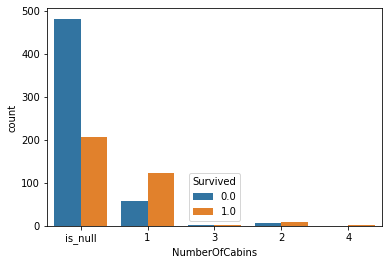

In [26]:
sns.countplot(hue='Survived', x='NumberOfCabins', data=temp_dataset);

But I found that there is no need to crumble. Next I tried to group them as "is_null" and "is_not_null" into a binary variable `MultiCabins` but that didn't help either.

### `FamilySize`

In [27]:
temp_dataset.groupby('SibSp').agg({'PassengerId': 'count', 'train_test': 'sum', 'Survived':'mean'}).sort_values(by="SibSp").rename(columns={"PassengerId": "count", "train_test": "count_train", "Survived": "% survived"})

count  count_train  % survived
SibSp                                
0        891          608    0.345395
1        319          209    0.535885
2         42           28    0.464286
3         20           16    0.250000
4         22           18    0.166667
5          6            5    0.000000
8          9            7    0.000000

In [28]:
temp_dataset.groupby('Parch').agg({'PassengerId': 'count', 'train_test': 'sum', 'Survived':'mean'}).sort_values(by="Parch").rename(columns={"PassengerId": "count", "train_test": "count_train", "Survived": "% survived"})

count  count_train  % survived
Parch                                
0       1002          678    0.343658
1        170          118    0.550847
2        113           80    0.500000
3          8            5    0.600000
4          6            4    0.000000
5          6            5    0.200000
6          2            1    0.000000
9          2            0         NaN

I thought to join the above variables into one, which I quickly tested later.

In [29]:
temp_dataset['FamilySize'] = temp_dataset['SibSp'] + temp_dataset['Parch'] + 1
temp_dataset.groupby('FamilySize').agg({'PassengerId': 'count', 'train_test': 'sum', 'Survived':'mean'}).sort_values(by="FamilySize").rename(columns={"PassengerId": "count", "train_test": "count_train", "Survived": "% survived"})

count  count_train  % survived
FamilySize                                
1             790          537    0.303538
2             235          161    0.552795
3             159          102    0.578431
4              43           29    0.724138
5              22           15    0.200000
6              25           22    0.136364
7              16           12    0.333333
8               8            6    0.000000
11             11            7    0.000000

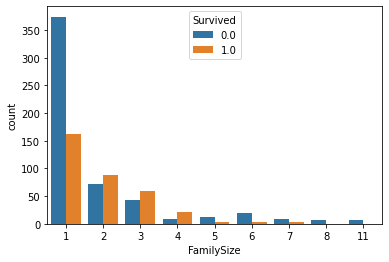

In [30]:
sns.countplot(hue='Survived', x='FamilySize', data=temp_dataset);

As I tested, this variable proved to be the best when it replaced `SibSp` and `Parch`.

### `PeopleOnTicket`

We can see that one ticket can be assigned to several people. In part, this information may coincide with the information on the number of family members. But not only that - also it can give us information about unmarried couples or groups of friends.

In addition, you can see that the ticket price given in the variable `Fare` applies to the entire ticket, including the multi-person tickets. 

It seems to me a good idea to calculate the price of the ticket "per person", which may be a better indication of the "quality" of the purchased cruise.

**But caution! In this case we extend the information in the training set using information from the test set! We have to be VERY careful with something like this.**

On consideration, however, I don't think it should hurt at all.

In [31]:
temp_dataset['PeopleOnTicket'] = temp_dataset.groupby('Ticket')['Ticket'].transform('count')
temp_dataset.groupby('PeopleOnTicket').agg({'PassengerId': 'count', 'train_test': 'sum', 'Survived':'mean'}).sort_values(by="PassengerId", ascending=False).rename(columns={"PassengerId": "count", "train_test": "count_train", "Survived": "% survived"})

count  count_train  % survived
PeopleOnTicket                                
1                 713          481    0.270270
2                 264          181    0.513812
3                 147          101    0.653465
4                  64           44    0.727273
5                  35           21    0.333333
7                  35           24    0.208333
6                  24           19    0.210526
8                  16           13    0.384615
11                 11            7    0.000000

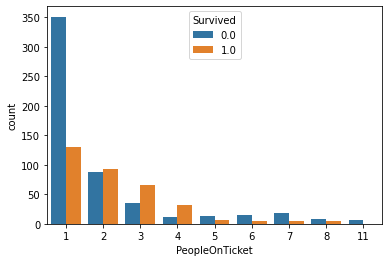

In [32]:
sns.countplot(hue='Survived', x='PeopleOnTicket', data=temp_dataset);

### `IsAlone`

This variable specifies people traveling alone.

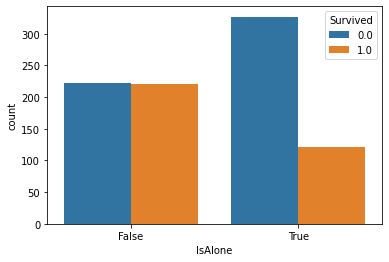

In [33]:
temp_dataset['IsAlone'] = (temp_dataset['FamilySize'] + temp_dataset['PeopleOnTicket']) == 2
sns.countplot(hue='Survived', x='IsAlone', data=temp_dataset);

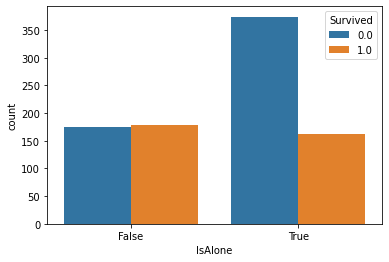

In [34]:
temp_dataset['IsAlone'] = temp_dataset['FamilySize'] == 1
sns.countplot(hue='Survived', x='IsAlone', data=temp_dataset);

We'll find this variable useful.

### `FarePerPerson`
We will create this new variable and look at it briefly.

In [35]:
temp_dataset['Fare'].fillna(temp_dataset['Fare'].median(), inplace=True) # only one record
temp_dataset['FarePerPerson'] = temp_dataset['Fare'] / temp_dataset['PeopleOnTicket']

In [36]:
temp_dataset[['Fare', 'FarePerPerson']].describe()

Fare  FarePerPerson
count  1309.000000    1309.000000
mean     33.281086      14.757395
std      51.741500      13.550458
min       0.000000       0.000000
25%       7.895800       7.550000
50%      14.454200       8.050000
75%      31.275000      15.000000
max     512.329200     128.082300

In [37]:
print("Corelations:", temp_dataset['Fare'].corr(temp_dataset['Survived']), temp_dataset['FarePerPerson'].corr(temp_dataset['Survived']))

Corelations: 0.2573065223849625 0.28833740739358893


I quickly checked the use of this variable and compared with the situation when we take it instead and with the `Fare` variable. It looks like it's best to use both of them.

### Grouping / bucketing ?

I tried a bit with different combinations of grouping (bucketing) of numerical variables `Age`, `Fare`, `FamilySize`, `FarePerPerson` and `PeopleOnTicket`. Finally - I abandoned this idea. It didn't improve the results of the initial tests.

Okay, we've been working a bit... Time to move on.

## 4. Data Preprocessing

Alright, now we have a hard nut to crack. We need to make a function that will transform our data to the desired form as we established earlier. Additionally, we'll encode categorical features (which is necessary) and normalize numerical features (which is usually helpful).

It's good idea to include all of operations to one function - then we will be able to use it again when we need it.

To sum up, we need to include the following operations:

1. Create new features that we defined in the previous section.
2. Fill in missing values of `Age`, `Fare` and `Embarked`.
3. Encode binary categorical features using label-encoding
3. Encode non-binary categorical features as a one-hot numeric array.
4. Drop the variables that we deem unnecessary.

Let's code a little.

In [38]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    
    # Copy the dataset (it's necessary to preserve the original dataset)
    df = df.copy()   
   
    # Create new features    
    # Create `Title`
    df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())    
    df['Title'] = df['Title'].apply(lambda x: 'Other' if x not in ['Mr', 'Miss', 'Mrs', 'Master'] else x)
    #### Create `TicketMark`
    df['TicketMark'] = df['Ticket'].apply(lambda x: x[:x.rfind(' ')].replace('.', '').replace('/', '').replace(' ', '').upper() if ' ' in x else "is_null")
    df['TicketMark'] = df['TicketMark'].apply(lambda x: 'Other' if x not in ['is_null', 'PC', 'CA', 'A5', 'SOTONOQ', 'STONO2', 'SCPARIS', 'WC', 'A4', 'FCC'] else x) 
    ### Create 'CabinMark'
    df['CabinMark'] = df['Cabin'].apply(lambda x: 'is_null' if pd.isna(x) else str(x)[0])
    df['CabinMark'] = df['CabinMark'].apply(lambda x: 'is_null' if x in ['G', 'T'] else x)
    # Create `FamilySize`
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    # Create `PeopleOnTicket
    df['PeopleOnTicket'] = df.groupby('Ticket')['Ticket'].transform('count')
    # Fill missing values - Fare
    df['Fare'] = df.groupby(['Pclass', 'FamilySize'])['Fare'].apply(lambda x: x.fillna(x.median()))
    # Create `FarePerPerson`
    df['FarePerPerson'] = df['Fare'] / df['PeopleOnTicket']
    # Create `IsAlone`
    df['IsAlone'] = (df['FamilySize'] + df['PeopleOnTicket']) == 2 
    
    # Fill missing values - Age
    df['Age'] = df.groupby(['Sex', 'Title'])['Age'].apply(lambda x: x.fillna(x.median()))    
    df['Embarked'].fillna(df['Embarked'].value_counts().idxmax(), inplace=True)
    
    # Age < 1
    df['Age'] = np.where(df['Age'] < 1, 0, df['Age'])
   
    # Transform binary categorical variable features
    labelencoder = LabelEncoder()
    df['Sex'] = labelencoder.fit_transform(df['Sex'])
    df['IsAlone'] = labelencoder.fit_transform(df['IsAlone'])
    
    # Transform non-binary categorical features with OneHotEncoder
    features_to_transform = ['Pclass', 'Embarked', 'Title', 'TicketMark', 'CabinMark']
    transformer = make_column_transformer((OneHotEncoder(sparse=False), features_to_transform))
    transformed = transformer.fit_transform(df)
    transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
    df = df.join(transformed_df)
    df.drop(features_to_transform , axis=1, inplace=True)
     
    # Drop unnecessary features
    df.drop(['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'] , axis=1, inplace=True)
    return df

Wow, quite pretty function. Let's see if it works.

In [39]:
preprocessed_data = preprocess_data(all_data)
preprocessed_data.head()

PassengerId  Survived  Sex   Age     Fare  train_test  FamilySize  \
0            1       0.0    1  22.0   7.2500           1           2   
1            2       1.0    0  38.0  71.2833           1           2   
2            3       1.0    0  26.0   7.9250           1           1   
3            4       1.0    0  35.0  53.1000           1           2   
4            5       0.0    1  35.0   8.0500           1           1   

   PeopleOnTicket  FarePerPerson  IsAlone  ...  \
0               1        7.25000        0  ...   
1               2       35.64165        0  ...   
2               1        7.92500        1  ...   
3               2       26.55000        0  ...   
4               1        8.05000        1  ...   

   onehotencoder__TicketMark_STONO2  onehotencoder__TicketMark_WC  \
0                               0.0                           0.0   
1                               0.0                           0.0   
2                               1.0                           0.0   
3                               0.0                           0.0   
4                               0.0                           0.0   

   onehotencoder__TicketMark_is_null  onehotencoder__CabinMark_A  \
0                                0.0                         0.0   
1                                0.0                         0.0   
2                                0.0                         0.0   
3                                1.0                         0.0   
4                                1.0                         0.0   

   onehotencoder__CabinMark_B  onehotencoder__CabinMark_C  \
0                         0.0                         0.0   
1                         0.0                         1.0   
2                         0.0                         0.0   
3                         0.0                         1.0   
4                         0.0                         0.0   

   onehotencoder__CabinMark_D  onehotencoder__CabinMark_E  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   onehotencoder__CabinMark_F  onehotencoder__CabinMark_is_null  
0                         0.0                               1.0  
1                         0.0                               0.0  
2                         0.0                               1.0  
3                         0.0                               0.0  
4                         0.0                               1.0  

[5 rows x 39 columns]

Ok, everything seems fine. 

Now we'll prepare a function that we'll use to normalize our data. We will provide a possibility to do this in three ways:

* Standarize data 
* Normalize data to [0, 1]
* Normalize data to [-1, 1]

We will test every possibility and see which our models will do best.

Note that according to the normalization rules, we will ignore outliers when computing normalizing values.

In [40]:
def normalize_data(df, norm=0, skip=[], non_extremum=False):
    """
    Normalizes data and returns a normalized set
    df: dataset
    norm: type of normalization (0: standarize, 1: normalize to [0, 1], 2: normalize to [-1, 1]
    skip: a list of columns to be omitted
    non_extremum: normalizing values are calculated disregarding extreme values
    """  
    
    # Copy the dataset
    df = df.copy()          
    df_no_extremum = df.copy()
            
    # Columns to transoform
    columns = [column for column in df.columns if column not in skip]
    
    if non_extremum:
        if "Fare" in columns:
            df_no_extremum.drop(df_no_extremum[df_no_extremum["Fare"] > 270].index, inplace=True)
        if "FarePerPerson" in columns:    
            df_no_extremum.drop(df_no_extremum[df_no_extremum["FarePerPerson"] > 56].index, inplace=True)
        if "Age" in columns:    
            df_no_extremum.drop(df_no_extremum[df_no_extremum["Age"] > 65].index, inplace=True)     
    
    for column in columns:        
        # Standarization
        if norm == 0:        
            m = df_no_extremum[column].mean()
            s = df_no_extremum[column].std()             
        # Normalization [0, 1]
        if norm == 1:
            m = df_no_extremum[column].min()
            s = df_no_extremum[column].max() - df[column].min()    
        # Normalization [-1, 1]
        if norm == 2:
            m = (df_no_extremum[column].max() + df_no_extremum[column].min()) / 2
            s = (df_no_extremum[column].max() - df_no_extremum[column].min()) / 2            
        df[column] = (df[column] - m) / s
        
    return df

Now we'll process our data with function we've created. We'll make 3 separate dataset depending on whether and how we normalize the data.

In [41]:
# Non-normalized data
df = preprocessed_data

# Standarized data 
df_stand = normalize_data(preprocessed_data, norm=0, skip=["PassengerId", "Survived", "train_test"], non_extremum=True)

# Normalized data to [0, 1]
df_norm1 = normalize_data(preprocessed_data, norm=1, skip=["PassengerId", "Survived", "train_test"], non_extremum=True)

# Normalized data to [-1, 1]
df_norm2 = normalize_data(preprocessed_data, norm=2, skip=["PassengerId", "Survived", "train_test"], non_extremum=True)

And now we'll split them for training and test data again. Note that it's enough to create just one target vector as it can be common to all databases.

In [42]:
y = df[df["train_test"]==1]["Survived"]

# Non-normalized data
X = df[df["train_test"]==1].drop(["PassengerId", "train_test", "Survived"], axis=1)
X_test = df[df["train_test"]==0].drop(["train_test", "Survived"], axis=1).reset_index(drop=True)

# Standarized data
X_stand = df_stand[df_stand["train_test"]==1].drop(["PassengerId", "train_test", "Survived"], axis=1)
X_test_stand = df_stand[df_stand["train_test"]==0].drop(["train_test", "Survived"], axis=1).reset_index(drop=True)

# Normalized data to [0, 1]
X_norm1 = df_norm1[df_norm1["train_test"]==1].drop(["PassengerId", "train_test", "Survived"], axis=1)
X_test_norm1 = df_norm1[df_norm1["train_test"]==0].drop(["train_test", "Survived"], axis=1).reset_index(drop=True)

# Normalized data to [-1, 1]
X_norm2 = df_norm2[df_norm2["train_test"]==1].drop(["PassengerId", "train_test", "Survived"], axis=1)
X_test_norm2 = df_norm2[df_norm2["train_test"]==0].drop(["train_test", "Survived"], axis=1).reset_index(drop=True)

So we can go to the best part of our little project - creating real machine lerning models. Let's go!

## 5. 🤖 Testing different models 🤖

Alright! It's been a long road but it was worth it. We begin the most exciting moment - the first fits and model test on our data.

But first things first. At the beginng we'll list (in dictionary) the models that we are using.

If you want to know where they are from, you can back to the beginning of the project to section: *1. Prepare our workspace (import and check necessary libraries)*.

In [43]:
models = {"KNeighborsClassifier": KNeighborsClassifier(),
          "LogisticRegression": LogisticRegression(), 
          "GaussianNB": GaussianNB(),
          "SupportVectorClassifier": SVC(probability=True),
          "RandomForestClassifier": RandomForestClassifier(),
          "DecisionTreeClassifier": DecisionTreeClassifier(),
          "XGBoost": XGBClassifier(),
          "LightGBM": LGBMClassifier()}

And we'll create similar dictionary, but without Logistic Regression - we'll need it in two cases.

In [44]:
models_no_LR = models.copy()
del models_no_LR["LogisticRegression"]

We come to the main point of this section of project. We'll evaluate and compare our models in order to choose the best.

Our evaluation and comparing will be simplified and limited to one metric only - to **accuracy**. The reason is that our final predictions will be evaluate with this metric (it is stated [here](https://www.kaggle.com/competitions/titanic/overview/evaluation)).

Now we get to the point. At the beginning we'll fit and test our models with their basic form with their default (hiper)parameters. Each model will be tested several times, on differently drawn data split (hence the list of seeds, affecting different data splits). I've decided to test models in two ways: for different seeds with the usual split of data and for different seeds (in smaller amounts) with using corss-validation. In theory, the results should be similiar.

Important! **An essential element of human work with machine learning models is a well-thought-out approach to data spliting.** Knowing what data we want to predict (test data), we should properly select training and validation data on which we could check our models. However, in our case, the test set provided by Kaggle does not seem to have been extracted in any particular way. We can assume that it was selected randomly, so we can also split our data to the training and validation sets at random.

Ok, let's back to work and let's write some function. We'll make sure that it's universal enough to use it later for modificated models. In case of big number of seeds, the using of this function may take a long time, so I'm going add some progress marker which will be printed.

In [45]:
def fit_and_score(models, X, y, seeds_list = []):
    """
    Fits and evaluates given machine learning models by accuracy.
    models : a dict of different machine learning models
    X : data with no labels
    y : labels assosciated with data
    seeds_list : list of seeds (optionaly) 
    """
    # Random seeds for reproducible results
    if not seeds_list:
        seeds_list = [np.random.randint(0,1000) for _ in range(20)]       
    # Make a dict to keep model scores
    model_scores = {}
    # Progress string
    progress = ""
    # Loop through models  
    for name, model in models.items():
        # Make lists to keep model scores depending on seed
        scores = []
        cv_scores = []
        # Variables to print progress
        count = 0
        num_seeds = len(seeds_list)
        progress += name + ": " 
        # Loop through seeds
        for seed in seeds_list:
            # Setup random seed
            np.random.seed(seed)
            # Split the data, fit the model and add it's score to the list
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
            model.fit(X_train, y_train)
            scores.append(model.score(X_test, y_test))  
            # Get cross-validation score and add it to list
            if count % 5 == 0:
                cv_scores += list(cross_val_score(model, X, y, cv=5, n_jobs=-1))
            # Print progress
            count += 1
            percent = "{:.0%}".format(count / num_seeds)
            clear_output(wait=True)
            print(progress + str(percent))         
        progress += str(percent) + "\n"
        # Evaluate the model by its mean of its scores and add it to model_scores dict
        model_scores[name] = (np.mean(scores), np.std(scores), np.mean(cv_scores), np.std(cv_scores))      
    return model_scores

Now we'll set up list of seeds for which random operations will be performed. By assigning the list with random seeds to a variable, we'll later be able to repeat the fitting of other models under the same conditions.

(Random seed for generete random seeds... that could looks funny. 🙂 But I see the sense in it.) 

In [46]:
np.random.seed(22)
number_of_seeds = 20
seeds_list = [np.random.randint(0,1000) for _ in range(number_of_seeds)] 

Ok, now we'll test all of our models on 3 generated databases. We'll immediately assign the results to the dataframes. 

As you can see, in the two cases we'll use models without logistic regression because it's not recommended to use it on not normalized data (as it turned out later, also with normalized values up to [-1, 1]). In the name of science, I tried it before anyway. 🙂 And model had problem with its.

In [47]:
model_scores = pd.DataFrame(fit_and_score(models_no_LR, X, y, seeds_list = seeds_list)).transpose().rename(columns={0: "score", 1: "std", 2: "cv_score", 3: "cv_std"})
model_scores_stand = pd.DataFrame(fit_and_score(models, X_stand, y, seeds_list = seeds_list)).transpose().rename(columns={0: "score_stand", 1: "std_stand", 2: "cv_score_stand", 3: "cv_std_stand"})
model_scores_norm1 = pd.DataFrame(fit_and_score(models, X_norm1, y, seeds_list = seeds_list)).transpose().rename(columns={0: "score_norm1", 1: "std_norm1", 2: "cv_score_norm1", 3: "cv_std_norm1"})
model_scores_norm2 = pd.DataFrame(fit_and_score(models_no_LR, X_norm2, y, seeds_list = seeds_list)).transpose().rename(columns={0: "score_norm2", 1: "std_norm2", 2: "cv_score_norm2", 3: "cv_std_norm2"})

KNeighborsClassifier: 100%
GaussianNB: 100%
SupportVectorClassifier: 100%
RandomForestClassifier: 100%
DecisionTreeClassifier: 100%
XGBoost: 100%
LightGBM: 100%


We'll do some simple operations on our dataframes...

In [48]:
all_model_scores = model_scores.join(model_scores_stand, how='outer').join(model_scores_norm1, how='outer').join(model_scores_norm2, how='outer')
all_model_scores["max_score"] = all_model_scores[["score", "score_stand", "score_norm1", "score_norm2"]].max(axis=1)
all_model_scores["cv_max_score"] = all_model_scores[["cv_score", "cv_score_stand", "cv_score_norm1", "cv_score_norm2"]].max(axis=1)
pd.options.display.float_format = '{:.2%}'.format

... and here they are:

In [49]:
all_model_scores.sort_values(by="max_score", ascending=False, inplace=True)
all_model_scores[["score", "std", "score_stand", "std_stand", "score_norm1", "std_norm1", "score_norm2", "std_norm2", "max_score"]]

score   std  score_stand  std_stand  score_norm1  \
SupportVectorClassifier 69.22% 3.42%       82.46%      2.69%       83.16%   
LogisticRegression         NaN   NaN       82.54%      2.71%       83.04%   
RandomForestClassifier  82.91% 2.76%       82.91%      2.81%       82.93%   
LightGBM                82.43% 2.03%       82.49%      2.01%       82.43%   
XGBoost                 81.93% 2.23%       81.93%      2.23%       81.93%   
KNeighborsClassifier    73.49% 2.90%       79.61%      2.40%       80.98%   
DecisionTreeClassifier  80.08% 2.86%       80.08%      2.86%       80.08%   
GaussianNB              74.78% 3.22%       58.66%     12.05%       62.18%   

                         std_norm1  score_norm2  std_norm2  max_score  
SupportVectorClassifier      2.51%       83.16%      2.51%     83.16%  
LogisticRegression           2.54%          NaN        NaN     83.04%  
RandomForestClassifier       2.73%       82.93%      2.73%     82.93%  
LightGBM                     2.03%       82.37%      2.19%     82.49%  
XGBoost                      2.23%       81.93%      2.23%     81.93%  
KNeighborsClassifier         2.17%       80.98%      2.17%     80.98%  
DecisionTreeClassifier       2.87%       80.08%      2.80%     80.08%  
GaussianNB                  14.17%       62.18%     14.17%     74.78%

In [50]:
all_model_scores.sort_values(by="cv_max_score", ascending=False, inplace=True)
all_model_scores[["cv_score", "cv_std", "cv_score_stand", "cv_std_stand", "cv_score_norm1", "cv_std_norm1", "cv_score_norm2", "cv_std_norm2", "cv_max_score"]]

cv_score  cv_std  cv_score_stand  cv_std_stand  \
SupportVectorClassifier    68.02%   4.46%          83.17%         2.56%   
XGBoost                    82.94%   1.99%          82.94%         1.99%   
LogisticRegression            NaN     NaN          82.27%         2.32%   
LightGBM                   82.72%   2.21%          82.61%         2.02%   
RandomForestClassifier     81.68%   2.14%          81.96%         2.33%   
KNeighborsClassifier       72.50%   2.80%          79.47%         2.25%   
DecisionTreeClassifier     78.96%   2.29%          79.10%         2.34%   
GaussianNB                 75.76%   4.08%          61.05%         8.59%   

                         cv_score_norm1  cv_std_norm1  cv_score_norm2  \
SupportVectorClassifier          82.72%         1.96%          82.72%   
XGBoost                          82.94%         1.99%          82.94%   
LogisticRegression               82.83%         2.13%             NaN   
LightGBM                         82.72%         2.21%          82.49%   
RandomForestClassifier           82.01%         2.25%          81.76%   
KNeighborsClassifier             79.69%         2.26%          79.69%   
DecisionTreeClassifier           79.04%         2.31%          78.99%   
GaussianNB                       66.21%        11.40%          66.21%   

                         cv_std_norm2  cv_max_score  
SupportVectorClassifier         1.96%        83.17%  
XGBoost                         1.99%        82.94%  
LogisticRegression                NaN        82.83%  
LightGBM                        2.82%        82.72%  
RandomForestClassifier          2.64%        82.01%  
KNeighborsClassifier            2.26%        79.69%  
DecisionTreeClassifier          2.33%        79.10%  
GaussianNB                     11.40%        75.76%

Yeah, finally! After a quick look at the results, it's clear that `GaussianNB` model is failing. Considering we have several prosperus models (and limited computing power 😞 ) I think what we'll leave `DecisionTreeClassifier` model too.

Although in some cases these are not big differences, I think from now on we will only focus on one type of data. In the next part we'll process the data normalized to the value [0, 1].

### First results

Ok, so let's make a more clear dataframe. I decided to create the scoreboard using the mean of the two model testing methods above.

In [51]:
selected_model_score = pd.DataFrame(all_model_scores[["score_norm1", "cv_score_norm1"]].mean(axis=1), columns=['score'])
selected_model_score.sort_values(by='score', ascending=False, inplace=True)
selected_model_score.drop(selected_model_score.tail(2).index,inplace=True)
selected_model_score

score
SupportVectorClassifier 82.94%
LogisticRegression      82.94%
LightGBM                82.57%
RandomForestClassifier  82.47%
XGBoost                 82.44%
KNeighborsClassifier    80.33%

I think that these scores above look not bad. But, of course, we won't stop here. Now we're going to try to improve the results of the models.

## 6. Improving selected models

Each of our models has some certain parameters that we can change, which will affect the effectiveness of the model. To distinguish them from immutable parameters, we call them **hyperparameters**.

There may be many such hypeparameters for one model. This leads to the fact, there may be hundreds or even thousends different combinations to test.

Depending on the available computing power, we can try different possibilities. In our case we'll do it in two different ways:
1) With using `GridSearchCV` - testing all combinations for a few selected hyperparameters
2) With using `RandomizedSearchCV` - testing randomly selected combinations for more hyperparameters

Each model has its own hyperparameters. How do we know which ones and how to tune them? The answer isn't simple. Certainly, a good first step is to check the model documentation. The next good step might be to find some tuning examples on the internet. However, it's worth paying attention to whether its use in such cases is similar to our problem. Next steps - just experiment. 🙂

Earlier, when we were testing our models, we created a function by which the models were tested on many different data splits. Now, when using `GridSearchCV` and `RandomizedSearchCV` we'll use the `RepeatedKFold` to make things easier for us.

In [52]:
rkf = RepeatedKFold(n_splits=5, n_repeats=4, random_state=22)

The parameters set above mean that the model will be tested four times (`n_repeats=4`) with using cross-validation divided into 5 folds (`n_splits=5`).

Ok, finally, let's move on!

### GridSearchCV



We'll create a hyperparameter grid - a dictionary with hyperparameters to test - for each of our tested model. 

To setup this below, I used the information from the model documentation, traced various similar problems on the internet, and just used my previous experience.

In [53]:
C = [0.5, 1, 1.5, 2, 4, 6, 8, 10]

# Support Vector Classifier
svc_grid = [
    {'C': C, 
     'gamma': ['scale', 'auto', 0.1, 0.05, 0.01, 0.005, 0.001],
     'kernel': ['rbf']},
    {'C': C,
     'kernel': ['poly']}]

# Logistic Regression
max_iter = [50, 100, 250, 500, 750, 1000, 2000]
lr_grid = [
    {'penalty': ['l2'],
     'C': C,
     'solver': ['lbfgs'],
     'max_iter': max_iter},
    {'penalty': ['l1', 'l2'],
     'C': C,
     'solver': ['liblinear'],
     'max_iter': max_iter},
    {'penalty': ['elasticnet'],
     'C': C,
     'solver': ['saga'],
     'max_iter': [1000, 2000, 3000, 4000],
     'l1_ratio':[0.1, 0.25, 0.4, 0.5, 0.6, 0.75, 0.9]}
     ]

# K Neighbors Classifier
knc_grid = {'n_neighbors' : [3, 5, 7, 10, 15, 20, 25, 31, 40, 50],
            'leaf_size': [5, 10, 15, 20, 30, 45, 60, 75],            
            'weights' : ['uniform', 'distance'],
            'algorithm' : ['auto', 'ball_tree','kd_tree'],
            'metric' : ['minkowski', 'chebyshev', 'euclidean', 'manhattan'],
            'p' : [1, 2]}

# LightGBM
lgbm_grid = {'num_leaves': [5, 10, 15, 31, 45, 60],
             'learning_rate':  [0.5, 0.25, 0.1, 0.075, 0.05, 0.01],
             'n_estimators': [30, 50, 100, 200],
             'max_depth': [-1, 4, 5, 6, 7, 8, 10]}

# XGBoost 
xgb_grid = {'min_child_weight': [0.5, 1, 1.5],
            'gamma': [0, 0.1, 0.01],
            'subsample': [0.8, 1],
            'colsample_bytree': [0.5, 1.0],
            'max_depth': [None, 6],
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.5, 0.25, 0.1, 0.075, 0.05]}

# Random Forest Classifier
rfc_grid = {'criterion': ['gini','entropy'],
            'max_depth': [4, 6, 10, None],
            'max_features': [None, 5, 10],
            'min_samples_leaf': [.1, 2, 3],
            'min_samples_split': [2, 3, 6],
            'n_estimators': [100, 200, 300]}

Next we'll create instances of `GridSearchCV` for each model.

In [54]:
grid_search_models = {}

# Support Vector Classifier
grid_search_models["SupportVectorClassifier"] = GridSearchCV(SVC(probability=True),
                                                             param_grid=svc_grid,
                                                             cv=rkf,
                                                             n_jobs=-1,
                                                             verbose=1)

# Logistic Regression
grid_search_models["LogisticRegression"] = GridSearchCV(LogisticRegression(),
                                                        param_grid=lr_grid,
                                                        cv=rkf,
                                                        n_jobs=1,
                                                        verbose=1)

# K Neighbors Classifier
grid_search_models["KNeighborsClassifier"] = GridSearchCV(KNeighborsClassifier(),
                                                          param_grid=knc_grid,
                                                          cv=rkf,
                                                          n_jobs=-1,
                                                          verbose=1)

# LightGBM
grid_search_models["LightGBM"] = GridSearchCV(LGBMClassifier(),
                                              param_grid=lgbm_grid,
                                              cv=rkf,
                                              n_jobs=-1,
                                              verbose=1)

# XGBoost 
grid_search_models["XGBoost"] = GridSearchCV(XGBClassifier(),
                                             param_grid=xgb_grid,
                                             cv=rkf,
                                             n_jobs=-1,
                                             verbose=1)

# Random Forest Classifier
grid_search_models["RandomForestClassifier"] = GridSearchCV(RandomForestClassifier(),
                                                            param_grid=rfc_grid,
                                                            cv=rkf,
                                                            n_jobs=-1,
                                                            verbose=1)

Now we can start fitting our combinations of models.

Models may have difficulties for some combinations of parameters. We don't mind that some of the possibilities will be missed. However, we'll set the warning to be suppressed.

In [55]:
for name, model in grid_search_models.items():    
    print(name)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=ConvergenceWarning)
        model.fit(X_norm1, y)

SupportVectorClassifier
Fitting 20 folds for each of 64 candidates, totalling 1280 fits
LogisticRegression
Fitting 20 folds for each of 392 candidates, totalling 7840 fits
KNeighborsClassifier
Fitting 20 folds for each of 3840 candidates, totalling 76800 fits
LightGBM
Fitting 20 folds for each of 1008 candidates, totalling 20160 fits
XGBoost
Fitting 20 folds for each of 1080 candidates, totalling 21600 fits
RandomForestClassifier
Fitting 20 folds for each of 648 candidates, totalling 12960 fits


We get the best combination of parameters for each model.

In [56]:
for name, model in grid_search_models.items():
    print(name)
    print(model.best_params_)

SupportVectorClassifier
{'C': 1, 'kernel': 'poly'}
LogisticRegression
{'C': 2, 'l1_ratio': 0.75, 'max_iter': 1000, 'penalty': 'elasticnet', 'solver': 'saga'}
KNeighborsClassifier
{'algorithm': 'auto', 'leaf_size': 5, 'metric': 'minkowski', 'n_neighbors': 25, 'p': 2, 'weights': 'distance'}
LightGBM
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 30, 'num_leaves': 31}
XGBoost
{'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.075, 'max_depth': None, 'min_child_weight': 1.5, 'n_estimators': 50, 'subsample': 0.8}
RandomForestClassifier
{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


Ok, now we'll setup dictionaries with models with the best combinations of parameters found.

In [57]:
grid_search_best_estimators = {}
for name, model in grid_search_models.items():
    grid_search_best_estimators[name] = model.best_estimator_

In [58]:
grid_model_scores = pd.DataFrame(fit_and_score(grid_search_best_estimators, X_norm1, y, seeds_list = seeds_list)).transpose().rename(columns={0: "score", 1: "std", 2: "cv_score", 3: "cv_std"})

SupportVectorClassifier: 100%
LogisticRegression: 100%
KNeighborsClassifier: 100%
LightGBM: 100%
XGBoost: 100%
RandomForestClassifier: 100%


And here they are:

In [59]:
grid_model_scores["mean_score"] = grid_model_scores[["score", "cv_score"]].mean(axis=1)
grid_model_scores.sort_values(by="mean_score", inplace=True, ascending=False)
grid_model_scores

score   std  cv_score  cv_std  mean_score
RandomForestClassifier  84.55% 2.37%    84.26%   2.07%      84.41%
LightGBM                84.08% 2.33%    84.40%   2.18%      84.24%
XGBoost                 83.99% 2.08%    83.73%   1.85%      83.86%
LogisticRegression      83.52% 2.70%    82.83%   2.38%      83.17%
SupportVectorClassifier 83.38% 2.10%    82.16%   1.98%      82.77%
KNeighborsClassifier    81.87% 2.62%    82.04%   1.16%      81.96%

We'll compare our previous scores with current.

In [60]:
selected_model_score = selected_model_score.join(grid_model_scores['mean_score']).rename(columns={'mean_score': 'grid_score'})
selected_model_score['grid_improve'] = selected_model_score['grid_score'] - selected_model_score['score']
selected_model_score.sort_values(by='grid_score', ascending=False, inplace=True)
selected_model_score

score  grid_score  grid_improve
RandomForestClassifier  82.47%      84.41%         1.93%
LightGBM                82.57%      84.24%         1.66%
XGBoost                 82.44%      83.86%         1.42%
LogisticRegression      82.94%      83.17%         0.24%
SupportVectorClassifier 82.94%      82.77%        -0.17%
KNeighborsClassifier    80.33%      81.96%         1.62%

We've improved our scores so it was worth to overheat the processor. 🙂

We tried out the combinations that seemed to be the best. Now we'll try to find better parameters from a larger pool at random.

### RandomizedSearchCV

Similarly to how we did it with `GridSearchCV`, we'll create hyperparameter grids.

In [61]:
C = np.logspace(-1, 1, 20)

# Support Vector Classifier
svc_random = [
    {'C': C, 
     'gamma': ['scale', 'auto']+list(np.logspace(-4, 0, 20)),
     'kernel': ['rbf']},
    {'C': C,
     'kernel': ['poly']}]


# Logistic Regression
max_iter = [50, 100, 200, 400, 600, 800, 1000, 1500, 2000, 4000]

lr_random = [
    {'penalty': ['l2'],
     'C': C,
     'solver': ['lbfgs', 'newton-cg'],
     'max_iter': max_iter},
    {'penalty': ['l1', 'l2'],
     'C': C,
     'solver': ['liblinear'],
     'max_iter': max_iter},
    {'penalty': ['elasticnet'],
     'C': C,
     'solver': ['saga'],
     'max_iter': [1000, 1500, 2000, 2500, 3000, 3500, 4000],
     'l1_ratio': np.arange(1,10,1)/10}
]

# K Neighbors Classifier
knc_random = {'n_neighbors' : np.arange(1,40,2),
              'leaf_size': np.arange(5,51,2),            
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'metric' : ['minkowski', 'chebyshev', 'euclidean', 'manhattan'],
              'p' : [1, 2]}

# LightGBM
lgbm_random = {'num_leaves': np.arange(10,101,5),
               'learning_rate':  np.logspace(-4,0,20),
               'n_estimators': [30, 50, 100, 200, 350, 500, 750],
               'max_depth': [-1, 3, 6, 10, 15]}

# XGBoost 
xgb_random = {'min_child_weight': np.logspace(-3,2,10),
              'gamma': np.logspace(-3,1,10),
              'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
              'colsample_bytree': [0.2, 0.35, 0.5, 0.65, 0.8, 1],
              'max_depth': [None, 3, 6, 10, 15],
              'n_estimators': [20, 50, 100, 200, 350, 500, 750],
              'learning_rate': np.logspace(-4,0,20)}

# Random Forest Classifier
rfc_random = {'bootstrap': [True, False],
              'criterion': ['gini','entropy'],
              'max_depth': [None, 3, 6, 10, 15],
              'max_features': [None, 5, 10],
              'min_samples_leaf': [1, 2, 4, 6, 8, 10, 15],
              'min_samples_split': [2, 4, 6, 8, 10, 15],
              'n_estimators': [50, 100, 200, 350, 500, 750]}

We'll create instance of `RandomizedSearchCV` for each model.

In [62]:
random_search_models = {}

# Support Vector Classifier
random_search_models["SupportVectorClassifier"] = RandomizedSearchCV(SVC(probability=True),
                                                                   param_distributions=svc_random,
                                                                   n_iter=300,
                                                                   cv=rkf,
                                                                   n_jobs=-1,
                                                                   verbose=1)
# Logistic Regression
random_search_models["LogisticRegression"] = RandomizedSearchCV(LogisticRegression(),
                                                                param_distributions=lr_random,
                                                                n_iter=300,
                                                                cv=rkf,
                                                                n_jobs=1,
                                                                verbose=1)


# K Neighbors Classifier
random_search_models["KNeighborsClassifier"] = RandomizedSearchCV(KNeighborsClassifier(),
                                                                  param_distributions=knc_random,
                                                                  n_iter=5000,
                                                                  cv=rkf,
                                                                  n_jobs=-1)


# LightGBM
random_search_models["LightGBM"] = RandomizedSearchCV(LGBMClassifier(),
                                                      param_distributions=lgbm_random,
                                                      n_iter=1500,
                                                      cv=rkf,
                                                      n_jobs=-1,
                                                      verbose=1)

# XGBoost 
random_search_models["XGBoost"] = RandomizedSearchCV(XGBClassifier(),
                                                     param_distributions=xgb_random,
                                                     n_iter=500,
                                                     cv=rkf,
                                                     n_jobs=-1,
                                                     verbose=1)

# Random Forest Classifier
random_search_models["RandomForestClassifier"] = RandomizedSearchCV(RandomForestClassifier(),
                                                                    param_distributions=rfc_random,
                                                                    n_iter=500,
                                                                    cv=rkf,
                                                                    n_jobs=-1,
                                                                    verbose=1)

And we start fitting our combinations of models.

In [63]:
for name, model in random_search_models.items():    
    print(name)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=ConvergenceWarning)
        model.fit(X_norm1, y)

SupportVectorClassifier
Fitting 20 folds for each of 300 candidates, totalling 6000 fits
LogisticRegression
Fitting 20 folds for each of 300 candidates, totalling 6000 fits
KNeighborsClassifier
LightGBM
Fitting 20 folds for each of 1500 candidates, totalling 30000 fits
XGBoost
Fitting 20 folds for each of 500 candidates, totalling 10000 fits
RandomForestClassifier
Fitting 20 folds for each of 500 candidates, totalling 10000 fits


We get the best found combination of parameters for each model.

In [64]:
for name, model in random_search_models.items():
    print(name)
    print(model.best_params_)

SupportVectorClassifier
{'kernel': 'rbf', 'gamma': 0.0206913808111479, 'C': 10.0}
LogisticRegression
{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 4000, 'C': 0.5455594781168519}
KNeighborsClassifier
{'weights': 'distance', 'p': 2, 'n_neighbors': 25, 'metric': 'euclidean', 'leaf_size': 21, 'algorithm': 'ball_tree'}
LightGBM
{'num_leaves': 100, 'n_estimators': 50, 'max_depth': -1, 'learning_rate': 0.05455594781168514}
XGBoost
{'subsample': 0.9, 'n_estimators': 100, 'min_child_weight': 0.001, 'max_depth': 10, 'learning_rate': 0.0001, 'gamma': 0.0027825594022071257, 'colsample_bytree': 0.8}
RandomForestClassifier
{'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10, 'criterion': 'gini', 'bootstrap': True}


We'll setup dictionaries with models with the best combinations of parameters found.

In [65]:
random_search_best_estimators = {}
for name, model in random_search_models.items():
    random_search_best_estimators[name] = model.best_estimator_

Same as we did before:

In [66]:
random_model_scores = pd.DataFrame(fit_and_score(random_search_best_estimators, X_norm1, y, seeds_list = seeds_list)).transpose().rename(columns={0: "score", 1: "std", 2: "cv_score", 3: "cv_std"})

SupportVectorClassifier: 100%
LogisticRegression: 100%
KNeighborsClassifier: 100%
LightGBM: 100%
XGBoost: 100%
RandomForestClassifier: 100%


And we have:

In [67]:
random_model_scores["mean_score"] = random_model_scores[["score", "cv_score"]].mean(axis=1)
random_model_scores.sort_values(by="mean_score", inplace=True, ascending=False)
random_model_scores

score   std  cv_score  cv_std  mean_score
XGBoost                 84.75% 1.87%    84.74%   1.65%      84.74%
RandomForestClassifier  84.72% 2.37%    84.37%   2.10%      84.55%
LightGBM                84.08% 2.20%    84.40%   2.18%      84.24%
SupportVectorClassifier 84.05% 2.51%    83.28%   2.12%      83.66%
LogisticRegression      83.38% 2.43%    82.94%   1.94%      83.16%
KNeighborsClassifier    81.84% 2.58%    82.04%   1.16%      81.94%

Finally we can compare with previous scores.

In [68]:
selected_model_score = selected_model_score.join(random_model_scores['mean_score']).rename(columns={'mean_score': 'random_score'})
selected_model_score['random_improve'] = selected_model_score['random_score'] - selected_model_score['score']
selected_model_score['max_score'] = selected_model_score[['grid_score', 'random_score']].max(axis=1)
selected_model_score.sort_values(by='max_score', ascending=False, inplace=True)
selected_model_score

score  grid_score  grid_improve  random_score  \
XGBoost                 82.44%      83.86%         1.42%        84.74%   
RandomForestClassifier  82.47%      84.41%         1.93%        84.55%   
LightGBM                82.57%      84.24%         1.66%        84.24%   
SupportVectorClassifier 82.94%      82.77%        -0.17%        83.66%   
LogisticRegression      82.94%      83.17%         0.24%        83.16%   
KNeighborsClassifier    80.33%      81.96%         1.62%        81.94%   

                         random_improve  max_score  
XGBoost                           2.31%     84.74%  
RandomForestClassifier            2.07%     84.55%  
LightGBM                          1.66%     84.24%  
SupportVectorClassifier           0.73%     83.66%  
LogisticRegression                0.22%     83.17%  
KNeighborsClassifier              1.61%     81.96%

Alright, we've undoubtedly made some improvements. Let’s move on to the summary of this part of project.

### Summary

The current scoreboard looks like this:

In [69]:
best_model_scores = pd.DataFrame(selected_model_score['max_score']).rename(columns={'max_score': 'score'})
best_model_scores

score
XGBoost                 84.74%
RandomForestClassifier  84.55%
LightGBM                84.24%
SupportVectorClassifier 83.66%
LogisticRegression      83.17%
KNeighborsClassifier    81.96%

In my opinion, considering our problem with which we are facing and the amount of data, these results look pretty good.

But… we want to try something more 🙂

Let's create new dictionaries with our favorites…

In [70]:
# Models for non-normalizated data
best_models = {"XGBoost": random_search_models["XGBoost"].best_estimator_,
               "LightGBM": grid_search_models["LightGBM"].best_estimator_,
               "RandomForestClassifier": random_search_models["RandomForestClassifier"].best_estimator_,
               "SupportVectorClassifier": random_search_models["SupportVectorClassifier"].best_estimator_,
               "LogisticRegression": grid_search_models["LogisticRegression"].best_estimator_,
               "KNeighborsClassifier": grid_search_models["KNeighborsClassifier"].best_estimator_}

… and let’s try some experiments!

## 7. Trying to experiment (a little) and final testing results

Of course, the possibilities of experimenting with models are limited only by our imagination. But it is necessary to ask yourself the question - how much time is worth spending on this?

In my humble opinion, the data that we have is not sufficient to achieve an effectiveness close to 1.0. In a real situation, we could try to get more data - both more records and more variables. I think it could help us to improve the quality of our models the most.

But we'll try do something. 🙂 We’ll use one of possibilities and we’ll play with combing models using `VotingClassifier`.

At the beginning, we need to create a list that will store our best models in the form of tuples (name, model).

In [71]:
best_models_tuples = []
for name, model in best_models.items():
    best_models_tuples.append((name, model))

Now we'll create a function, which will test all of possible combinations of our models and which will write them into the list with their scores.

In [72]:
combination_scores_hard = []
combination_scores_soft = []

len_combination = 2**len(best_models_tuples)-len(best_models_tuples)-1
count = 0

for L in range(2, len(best_models_tuples)+1):
    for combination in combinations(best_models_tuples, L):
        # Hard Voting
        voting = VotingClassifier(estimators = combination, 
                                  voting = 'hard')
        combination_scores_hard.append((combination, cross_val_score(voting, X_norm1, y, cv=rkf).mean()))
        # Soft Voting
        voting = VotingClassifier(estimators = combination, 
                                  voting = 'soft')
        combination_scores_soft.append((combination, cross_val_score(voting, X_norm1, y, cv=rkf).mean()))
        # Print progress
        count += 1
        percent = "{:.0%}".format(count / len_combination)
        clear_output(wait=True)
        print("Progess: " + str(percent))

Progess: 100%


Now we'll just sort this list by score and then we will get the best combinations of models.

In [73]:
combination_scores_hard.sort(reverse=True, key=lambda x: x[1])
combination_scores_soft.sort(reverse=True, key=lambda x: x[1])

print("*** Hard Voting ***")
for n in range(0, 3):
    print(f"{n+1}. combination of models:")
    for combination_score in combination_scores_hard[n][0]:
        print ("   -", combination_score[0])
    print("   Score: " + "{:.2%}".format(combination_scores_hard[n][1]))
    
print("\n*** Soft Voting ***")
for n in range(0, 3):
    print(f"{n+1}. combination of models:")
    for combination_score in combination_scores_soft[n][0]:
        print ("   -", combination_score[0])
    print("   Score: " + "{:.2%}".format(combination_scores_soft[n][1]))

*** Hard Voting ***
1. combination of models:
   - XGBoost
   - RandomForestClassifier
   - SupportVectorClassifier
   - LogisticRegression
   - KNeighborsClassifier
   Score: 84.34%
2. combination of models:
   - LightGBM
   - RandomForestClassifier
   - SupportVectorClassifier
   - LogisticRegression
   - KNeighborsClassifier
   Score: 84.26%
3. combination of models:
   - XGBoost
   - LogisticRegression
   - KNeighborsClassifier
   Score: 84.23%

*** Soft Voting ***
1. combination of models:
   - XGBoost
   - LightGBM
   - RandomForestClassifier
   - SupportVectorClassifier
   - LogisticRegression
   Score: 84.29%
2. combination of models:
   - RandomForestClassifier
   - SupportVectorClassifier
   Score: 84.26%
3. combination of models:
   - XGBoost
   - RandomForestClassifier
   - LogisticRegression
   - KNeighborsClassifier
   Score: 84.17%


Ok, now we'll setup models from the obtained combinations and we'll add them to our dictionary `best_models`. We'll choose two from each voting method to get a round number of 10 models tested. 🙂

In [74]:
# Hard Voting
estimators = list(combination_scores_hard[0][0])
model_voting = VotingClassifier(estimators = estimators,
                                voting = 'hard')
best_models['VotingHard_xgb_rfc_svc_lr_knc'] = model_voting

estimators = list(combination_scores_hard[1][0])
model_voting = VotingClassifier(estimators = estimators,
                                voting = 'hard')
best_models['VotingHard_lgbm_rfc_svc_lr_knc'] = model_voting


# Soft Voting
estimators = list(combination_scores_soft[0][0])
model_voting = VotingClassifier(estimators = estimators,
                                voting = 'soft')
best_models['VotingSoft_xgb_lgbm_rfc_svc_lr'] = model_voting

estimators = list(combination_scores_soft[1][0])
model_voting = VotingClassifier(estimators = estimators,
                                voting = 'soft')
best_models['VotingSoft_rf_svc'] = model_voting

### Final results
Now it's time to final comparing of our models.

Are you ready? I hope so. 🙂

In [75]:
best_models_scores = pd.DataFrame(fit_and_score(best_models, X_norm1, y, seeds_list = seeds_list)).transpose().rename(columns={0: "score", 1: "std", 2: "cv_score", 3: "cv_std"})

XGBoost: 100%
LightGBM: 100%
RandomForestClassifier: 100%
SupportVectorClassifier: 100%
LogisticRegression: 100%
KNeighborsClassifier: 100%
VotingHard_xgb_rfc_svc_lr_knc: 100%
VotingHard_lgbm_rfc_svc_lr_knc: 100%
VotingSoft_xgb_lgbm_rfc_svc_lr: 100%
VotingSoft_rf_svc: 100%


In [76]:
best_models_scores["mean_score"] = best_models_scores[["score", "cv_score"]].mean(axis=1)
best_models_scores.sort_values(by="mean_score", inplace=True, ascending=False)
best_models_scores

score   std  cv_score  cv_std  mean_score
VotingHard_xgb_rfc_svc_lr_knc  84.75% 2.17%    84.88%   1.55%      84.81%
XGBoost                        84.75% 1.87%    84.74%   1.65%      84.74%
VotingHard_lgbm_rfc_svc_lr_knc 84.75% 2.53%    84.71%   1.85%      84.73%
RandomForestClassifier         84.72% 2.37%    84.29%   1.94%      84.50%
VotingSoft_xgb_lgbm_rfc_svc_lr 84.69% 2.78%    84.26%   2.01%      84.48%
VotingSoft_rf_svc              84.75% 2.63%    84.03%   1.95%      84.39%
LightGBM                       84.08% 2.33%    84.40%   2.18%      84.24%
SupportVectorClassifier        84.05% 2.51%    83.28%   2.12%      83.66%
LogisticRegression             83.52% 2.70%    82.83%   2.38%      83.17%
KNeighborsClassifier           81.87% 2.62%    82.04%   1.16%      81.96%

**Ok, and this is it.** 

A long way behind us. In my opinion these scores look promising. Of course, there is always something we could do more, which we will write more about in the last part of this project. But I think this is a good time to (at least for the time being) end our fun with testing and improving models. 

Now we'll proceed to train our models on the whole train data. Then we'll save and load our models to create the possibility to use them laiter without repeating the entire process.

## 8. Saving, loading and final training selected models

Having selected models with adjusted hyperparameters, we'll save them to files. Thanks to this, we will be able to use then in the future without having to repeat all the earlier, time-consuming calculations.

First, however, we will train our models one last time, but this time on the entire training data.

In [77]:
for name, model in best_models.items():
    model.fit(X_norm1, y)

Now we can save (dump) them to files.

In [78]:
for name, model in best_models.items():
    pickle.dump(model, open('models/' + name + '.pkl', "wb"))

And we'll load them.

In [79]:
loaded_models = {}
for filename in os.listdir("models"):
    name = filename.split('.')[0]
    model = pickle.load(open('models/' + filename, 'rb'))
    loaded_models[name] = model

Let's check if everything is fine.

In [80]:
loaded_models_score = pd.DataFrame(fit_and_score(loaded_models, X_norm1, y, seeds_list = seeds_list)).transpose().rename(columns={0: "score", 1: "std", 2: "cv_score", 3: "cv_std"})

VotingHard_lgbm_rfc_svc_lr_knc: 100%
VotingSoft_xgb_lgbm_rfc_svc_lr: 100%
KNeighborsClassifier: 100%
VotingHard_xgb_rfc_svc_lr_knc: 100%
LogisticRegression: 100%
VotingSoft_rf_svc: 100%
XGBoost: 100%
RandomForestClassifier: 100%
SupportVectorClassifier: 100%
LightGBM: 100%


In [81]:
loaded_models_score["mean_score"] = loaded_models_score[["score", "cv_score"]].mean(axis=1)
loaded_models_score.sort_values(by="mean_score", inplace=True, ascending=False)
loaded_models_score

score   std  cv_score  cv_std  mean_score
VotingHard_xgb_rfc_svc_lr_knc  84.75% 2.17%    84.93%   1.56%      84.84%
VotingHard_lgbm_rfc_svc_lr_knc 84.75% 2.53%    84.79%   2.02%      84.77%
XGBoost                        84.75% 1.87%    84.74%   1.65%      84.74%
RandomForestClassifier         84.72% 2.37%    84.26%   1.86%      84.49%
VotingSoft_xgb_lgbm_rfc_svc_lr 84.69% 2.78%    84.15%   2.08%      84.42%
VotingSoft_rf_svc              84.75% 2.63%    83.98%   1.99%      84.36%
LightGBM                       84.08% 2.33%    84.40%   2.18%      84.24%
SupportVectorClassifier        84.05% 2.51%    83.28%   2.12%      83.66%
LogisticRegression             83.52% 2.70%    82.83%   2.38%      83.17%
KNeighborsClassifier           81.87% 2.62%    82.04%   1.16%      81.96%

Okay, everything looks fine, so let's redo the models fit to the full data.

In [82]:
for name, model in loaded_models.items():
    model.fit(X_norm1, y)

Now we are ready to start making predictions.

## 9. Making predictions and submissions to send

**The time has come** - we'll prepere our predicts to send them to Kaggle. I'm really very curious about how we'll go. 🙂

First, let's take a look at our test set and see if everything is ok.

In [83]:
pd.reset_option('display.float_format')
X_test_norm1.head()

PassengerId  Sex       Age      Fare  FamilySize  PeopleOnTicket  \
0          892  1.0  0.530769  0.029769         0.0             0.0   
1          893  0.0  0.723077  0.026616         0.1             0.0   
2          894  1.0  0.953846  0.036835         0.0             0.0   
3          895  1.0  0.415385  0.032937         0.0             0.0   
4          896  0.0  0.338462  0.046721         0.2             0.1   

   FarePerPerson  IsAlone  onehotencoder__Pclass_1  onehotencoder__Pclass_2  \
0       0.141207      1.0                      0.0                      0.0   
1       0.126252      0.0                      0.0                      0.0   
2       0.174723      1.0                      0.0                      1.0   
3       0.156236      1.0                      0.0                      0.0   
4       0.110808      0.0                      0.0                      0.0   

   ...  onehotencoder__TicketMark_STONO2  onehotencoder__TicketMark_WC  \
0  ...                               0.0                           0.0   
1  ...                               0.0                           0.0   
2  ...                               0.0                           0.0   
3  ...                               0.0                           0.0   
4  ...                               0.0                           0.0   

   onehotencoder__TicketMark_is_null  onehotencoder__CabinMark_A  \
0                                1.0                         0.0   
1                                1.0                         0.0   
2                                1.0                         0.0   
3                                1.0                         0.0   
4                                1.0                         0.0   

   onehotencoder__CabinMark_B  onehotencoder__CabinMark_C  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   onehotencoder__CabinMark_D  onehotencoder__CabinMark_E  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   onehotencoder__CabinMark_F  onehotencoder__CabinMark_is_null  
0                         0.0                               1.0  
1                         0.0                               1.0  
2                         0.0                               1.0  
3                         0.0                               1.0  
4                         0.0                               1.0  

[5 rows x 37 columns]

Now we'll make seperated predictions fo each of our selected models and at one go we'll export them to `.csv` files according to the pattern expected by Kaggle.

In [85]:
for name, model in loaded_models.items():
    model.fit(X_norm1, y)
    predictions = model.predict(X_test_norm1.drop("PassengerId", axis=1)).astype(int)
    submission = pd.DataFrame(data={'PassengerId': X_test_norm1["PassengerId"], 'Survived': predictions})
    submission.to_csv('submissions/' + name + '.csv', index=False)

Alright, we did it! Now I'm sending our predictions to Kaggle and I'll show results in the next section. Are you ready? 🙂

## 10. Getting evaluated by Kaggle and summary

Without more ado, let's check how Kaggle has evaluated us.

### Kaggle's evaluation

![kaggle_scores](images/kaggle_scores.png)

Ooookay! We'll write something about that in a moment, but first let's put them in the dataframe and compare them to the results we expected.

In [86]:
kaggle_scores = {"SupportVectorClassifier": 0.79425,
                "LogisticRegression": 0.77511,
                "KNeighborsClassifier": 0.78947,
                "LightGBM": 0.76315,
                "XGBoost": 0.77033,
                "RandomForestClassifier": 0.77272,
                "VotingHard_xgb_rfc_svc_lr_knc": 0.78468,
                "VotingHard_lgbm_rfc_svc_lr_knc": 0.78229,
                "VotingSoft_xgb_lgbm_rfc_svc_lr": 0.77272,
                "VotingSoft_rf_svc": 0.77272}

In [88]:
final_scores = loaded_models_score.join(pd.DataFrame.from_dict(kaggle_scores, orient='index', columns=['kaggle_score'])).rename(columns={'mean_score': 'our_test_score'})
final_scores.sort_values(by='kaggle_score', ascending=False, inplace=True)
pd.options.display.float_format = '{:.2%}'.format
final_scores[['our_test_score', 'kaggle_score']]

our_test_score  kaggle_score
SupportVectorClassifier                 83.66%        79.42%
KNeighborsClassifier                    81.96%        78.95%
VotingHard_xgb_rfc_svc_lr_knc           84.84%        78.47%
VotingHard_lgbm_rfc_svc_lr_knc          84.77%        78.23%
LogisticRegression                      83.17%        77.51%
RandomForestClassifier                  84.49%        77.27%
VotingSoft_xgb_lgbm_rfc_svc_lr          84.42%        77.27%
VotingSoft_rf_svc                       84.36%        77.27%
XGBoost                                 84.74%        77.03%
LightGBM                                84.24%        76.31%

### Summary

We’ve made it to the end. Is our score good or bad? The answer isn’t simple.

Firstly - why are our final results worse than those of the our tests? 

We've probably overfitted models a bit. This is a situation where our models have fitted too much to the training data, which is why they do not do that well on the test.

Another reason is probably that the structure of the test data is slightly different than that of the training data. We haven't spent much time exploring this possibility.

I think the key might be the different distribution of the variable `sex`, which is by far the most significant of all the variables. You know, "Women and children first" but age is not that important in this case. 🙂

Check this out. I did one more submission aside, 'sex_only.csv', where I assumed all women survived and all men did not. Look at the result 🙂

![survived_by_sex](images/survived_by_sex.png)

An impressive result, isn't it? 😉

I saw in the traning dataset that the vast majority of men didn't survive, which makes them much more predictable. With women the matter is more difficult. Women like women - are more difficult to predict. 🙂

We have a greater proportion of women in the test dataset than in the training set, which made our models a more difficult task.

What about the Kaggle leaderboard?

![kaggle_leaderboard](images/kaggle_leaderboard.png)

**We placed 588 out of 13360 place (although the score is also the same for 508-620 places), so we are among the top 3.8% - 4.6%.** 

But - that cannot be a serious point of reference. For example you can easily find on the Kaggle webiste in Titanic subpage codes like "How to be on the top of leaderboard…” thanks to which you can easly generate a file with a ready target vector that will give you an accuracy equal to 1.0... 🙃

The problem we were facing was quite unusual. Although the data set was generated specifically for this task, taking into account the number and appearance of variables – it’s hard to expect an accuracy close to 1. Our 79,425% score of our best model sounds quite reasonable.

I think we can stay with this result. Although, of course, it's a good idea to ask...

### What can we do more?

Several things come to mind:
* First of all, if we want to maximize the result, we should focus on a specific model and adjust the entire methodology to it. In this project, which is somewhat of a guide to the basics of ML, we've tested the different models in a general way.
* We should pay more attention to recognizing the structure of the test data. I think that if we had tailored the training data structure to it, we would have obtained better results.
* If our project concerned a real-time issue - we definitely should take care of extending the dataset as a priority. Working on models is important, but there is a good chance that we could improve our results with more data.

And that's all for now. Thanks for the journey together through this project. I hope you enjoyed it as much as I did. And feel free to visit my other projects that can be found on my GitHub profile!

See you next time!

Marek